In [1]:
import csv
import pandas as pd
from datetime import datetime

def load_csv(csv_filename, columns, to_flatten, value):
    with open(csv_filename, 'r', newline='\n') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        
        data = {}
        header = {elt: index for index, elt in enumerate(next(csv_reader))}
        flattens = set()
        
        for row in csv_reader:
            key = tuple(row[header[column]] for column in columns)
            flattens.add(row[header[to_flatten]])
            try:
                data[key][row[header[to_flatten]]] = row[header[value]]
            except KeyError:
                data[key] = {row[header[to_flatten]]: row[header[value]]}
                
        df_dict = {elt:  [] for elt in columns}
        df_dict.update({elt: [] for elt in flattens})
    
        for key, values in data.items():
            for index, column in enumerate(columns):
                df_dict[column].append(key[index])
            for flatten in flattens:
                df_dict[flatten].append(values.get(flatten, 0)) 
        
        return pd.DataFrame(df_dict)

In [2]:
p_columns = ['LIBELLE_ARRET', 'CAT_JOUR', 'ID_REFA_LDA']
p_flatten = 'TRNC_HORR_60'
p_value = 'pourc_validations'

v_columns = ['LIBELLE_ARRET', 'JOUR', 'ID_REFA_LDA']
v_flatten = 'CATEGORIE_TITRE'
v_value = 'NB_VALD'

profile_s1 = load_csv('Data/validations-profils-horaires-2017s1.csv', p_columns, p_flatten, p_value)
profile_s2 = load_csv('Data/validations-profils-horaires-2017s2.csv', p_columns, p_flatten, p_value)

validation_s1 = load_csv('Data/validations-nombre-par-jour-2017s1.csv', v_columns, v_flatten, v_value)
validation_s2 = load_csv('Data/validations-nombre-par-jour-2017s2.csv', v_columns, v_flatten, v_value)

In [3]:
profile_s2

,0H-1H,10H-11H,11H-12H,12H-13H,13H-14H,14H-15H,15H-16H,16H-17H,17H-18H,18H-19H,...,4H-5H,5H-6H,6H-7H,7H-8H,8H-9H,9H-10H,CAT_JOUR,ID_REFA_LDA,LIBELLE_ARRET,ND
0,0.1,6.75,7.33,7.45,8.55,8.13,6.93,6.93,6.96,5.44,...,0.06,1.57,4.59,6.5,8.2,7.91,SAHV,68419,VAIRES-TORCY,0
1,0.07,7.42,7.41,7.7,7.65,7.15,7.38,6.75,6.18,5.42,...,0.08,1.87,4.91,6.36,8.02,7.9,SAVS,68419,VAIRES-TORCY,0
2,0.02,7.21,6.46,6.21,6.69,4.69,10.01,7.81,7.66,12.15,...,0,0.21,6.25,1.41,10.32,1.68,DIJFP,62471,VERNEUIL-L'ETANG,0
3,0,2.67,2.22,2.25,1.74,1.46,1.34,2.21,2.31,1.29,...,0.0,5.32,23.31,35.1,12.47,5.01,JOHV,62471,VERNEUIL-L'ETANG,0
4,0.0,2.9,3.14,3.03,2.92,2.24,2.26,2.51,2.61,2.14,...,0.0,4.75,20.51,31.81,12.47,4.88,JOVS,62471,VERNEUIL-L'ETANG,0
5,0,7.76,8.86,6.38,7.0,5.29,6.95,4.76,4.76,6.71,...,0,0,8.33,7.1,11.1,8.62,SAHV,62471,VERNEUIL-L'ETANG,0
6,0,7.07,7.97,5.53,8.0,5.03,6.57,4.83,4.33,5.77,...,0,0.1,9.1,6.77,11.4,8.2,SAVS,62471,VERNEUIL-L'ETANG,0
7,0,3.84,7.13,7.0,6.31,6.86,11.93,8.64,6.31,6.72,...,0,1.51,3.84,6.17,3.43,5.08,DIJFP,68311,VILLIERS-MONTBARBIN,0
8,0.05,4.71,3.36,3.61,2.49,3.89,3.46,4.21,2.62,2.12,...,0.05,2.09,17.75,26.3,10.09,11.12,JOHV,68311,VILLIERS-MONTBARBIN,0
9,0,5.99,4.18,3.37,4.33,6.09,5.79,6.09,4.23,3.17,...,0,3.22,14.95,21.44,7.4,5.84,JOVS,68311,VILLIERS-MONTBARBIN,0


## Profil type

In [4]:
def cleanProfile(df,CAT_JOUR,columnDrop, columnOrder,HOR):
    dfR=df.dropna()
    dfR=dfR.loc[dfR['CAT_JOUR'].isin(CAT_JOUR),:]
    dfR=dfR.loc[dfR['ID_REFA_LDA']!="?",:]
    for h in HOR:
     dfR[h]=dfR[h].astype(float) 
    #dfR['ID_REFA_LDA']=dfR.ID_REFA_LDA.astype(float)
    dfR=dfR.reset_index(drop=True)
    #dfR=dfR.drop(columns=columnDrop)
    #dfR=dfR[columnOrder]
    return dfR

CAT_JOUR=["JOHV"]
columnDrop=[]
columnOrder=[]
HOR=['0H-1H', '10H-11H', '11H-12H', '12H-13H', '13H-14H', '14H-15H',
       '15H-16H', '16H-17H', '17H-18H', '18H-19H', '19H-20H', '1H-2H',
       '20H-21H', '21H-22H', '22H-23H', '23H-0H', '2H-3H', '3H-4H', '4H-5H',
       '5H-6H', '6H-7H', '7H-8H', '8H-9H', '9H-10H']
profile_s1=cleanProfile(profile_s1,CAT_JOUR,columnDrop, columnOrder,HOR)
profile_s2=cleanProfile(profile_s2,CAT_JOUR,columnDrop, columnOrder,HOR)

In [5]:
counterror=0

profile=profile_s1.copy()
for i in range(profile_s1.shape[0]):
    ID_REFA_LDA=profile_s1.iloc[i,25]
    for h in range(24):
        pourc_validations_1=profile_s1.iloc[i,h]
        try:
            pourc_validations_2=profile_s2.loc[(profile_s2['ID_REFA_LDA']==ID_REFA_LDA),:].iloc[0,h]
        except Exception as e:
            counterror+=1
            print(e,counterror)
            pourc_validations_2=pourc_validations_1
        profile.iloc[i,h]=(pourc_validations_1+pourc_validations_2)/2

single positional indexer is out-of-bounds 1
single positional indexer is out-of-bounds 2
single positional indexer is out-of-bounds 3
single positional indexer is out-of-bounds 4
single positional indexer is out-of-bounds 5
single positional indexer is out-of-bounds 6
single positional indexer is out-of-bounds 7
single positional indexer is out-of-bounds 8
single positional indexer is out-of-bounds 9
single positional indexer is out-of-bounds 10
single positional indexer is out-of-bounds 11
single positional indexer is out-of-bounds 12
single positional indexer is out-of-bounds 13
single positional indexer is out-of-bounds 14
single positional indexer is out-of-bounds 15
single positional indexer is out-of-bounds 16
single positional indexer is out-of-bounds 17
single positional indexer is out-of-bounds 18
single positional indexer is out-of-bounds 19
single positional indexer is out-of-bounds 20
single positional indexer is out-of-bounds 21
single positional indexer is out-of-bounds 

## Validations Number

In [6]:
validation=pd.concat([validation_s1,validation_s2])
validation=validation.drop(columns=['NON DEFINI'])
TITRE=['AMETHYSTE','AUTRE TITRE', 'FGT', 'IMAGINE R', 'NAVIGO', 'TST']
for titre in TITRE:
    validation[titre]=validation[titre].replace('Moins de 5','5')
    validation[titre]=validation[titre].replace('','0')
for titre in TITRE:
    validation[titre]=validation[titre].astype(float)
validation['VAL']=sum(validation[titre] for titre in TITRE)
validation=validation.drop(columns=TITRE)

In [7]:
validation.head()

,ID_REFA_LDA,JOUR,LIBELLE_ARRET,VAL
0,71426,2017-03-17,BARBES-ROCHECHOUART,32333.0
1,71785,2017-03-17,MAIRIE DE MONTREUIL,23329.0
2,72168,2017-03-17,MAIRIE DE SAINT-OUEN,12813.0
3,71909,2017-03-17,MAIRIE DES LILAS,13757.0
4,70488,2017-03-17,MAIRIE D'IVRY,9086.0


In [8]:
def week_number(row):
    d=datetime.strptime(row.JOUR, "%Y-%m-%d")
    return d.isocalendar()[1]
def week_day(row):
    d=datetime.strptime(row.JOUR, "%Y-%m-%d")
    return d.isocalendar()[2]
validation['WEEK_NUMBER']= validation.apply (lambda row: week_number (row),axis=1)
validation['WEEK_DAY']= validation.apply (lambda row: week_day (row),axis=1)

In [9]:
validation.head()

,ID_REFA_LDA,JOUR,LIBELLE_ARRET,VAL,WEEK_NUMBER,WEEK_DAY
0,71426,2017-03-17,BARBES-ROCHECHOUART,32333.0,11,5
1,71785,2017-03-17,MAIRIE DE MONTREUIL,23329.0,11,5
2,72168,2017-03-17,MAIRIE DE SAINT-OUEN,12813.0,11,5
3,71909,2017-03-17,MAIRIE DES LILAS,13757.0,11,5
4,70488,2017-03-17,MAIRIE D'IVRY,9086.0,11,5


In [10]:
JOHV=[1,2,3,4,5]
Vacances=[6,7,14,15,28,29,30,31,32,33,34,35,43,44,52]
Jours_feries=['2017-01-01','2017-04-16','2017-04-17','2017-05-01','2017-05-08','2017-05-25','2017-06-05','2017-07-14','2017-08-15','2017-11-01','2017-11-11','2017-12-25']
validation=validation.loc[validation['WEEK_DAY'].isin(JOHV),:]
validation=validation.loc[~validation['WEEK_NUMBER'].isin(Vacances),:]

In [11]:
validation.head()

,ID_REFA_LDA,JOUR,LIBELLE_ARRET,VAL,WEEK_NUMBER,WEEK_DAY
0,71426,2017-03-17,BARBES-ROCHECHOUART,32333.0,11,5
1,71785,2017-03-17,MAIRIE DE MONTREUIL,23329.0,11,5
2,72168,2017-03-17,MAIRIE DE SAINT-OUEN,12813.0,11,5
3,71909,2017-03-17,MAIRIE DES LILAS,13757.0,11,5
4,70488,2017-03-17,MAIRIE D'IVRY,9086.0,11,5


In [12]:
profile.head()

,0H-1H,10H-11H,11H-12H,12H-13H,13H-14H,14H-15H,15H-16H,16H-17H,17H-18H,18H-19H,...,4H-5H,5H-6H,6H-7H,7H-8H,8H-9H,9H-10H,CAT_JOUR,ID_REFA_LDA,LIBELLE_ARRET,ND
0,0.590,3.775,3.700,5.03,5.340,4.785,5.115,7.190,9.85,8.630,...,0.0,0.610,1.545,5.860,13.475,8.405,JOHV,71654,REUILLY-DIDEROT,0
1,0.630,3.535,3.220,4.35,4.450,3.575,4.220,7.355,12.65,11.860,...,0.0,0.230,1.140,5.035,12.000,7.965,JOHV,73648,RICHARD LENOIR,0
2,0.990,2.115,2.995,6.17,4.730,4.150,4.515,6.605,13.72,20.070,...,0.0,0.125,0.280,1.080,3.350,3.215,JOHV,71330,RICHELIEU-DROUOT,0
3,0.655,4.950,4.575,4.30,5.625,4.810,4.900,6.605,7.52,7.140,...,0.0,1.265,2.730,8.945,14.120,8.830,JOHV,71977,RIQUET,0
4,0.320,2.640,2.570,3.70,3.230,3.195,3.930,6.220,12.19,17.245,...,0.0,0.490,1.290,5.930,12.830,6.005,JOHV,71034,BILLANCOURT,0


In [13]:
Data=profile.copy()
for i in range(Data.shape[0]):
    ID_REFA_LDA=Data.iloc[i,25]
    val_day=sum(validation.loc[validation['ID_REFA_LDA']==ID_REFA_LDA,:].iloc[:,3])
    for h in range(24):
        Data.iloc[i,h]=int(Data.iloc[i,h]*val_day)

In [14]:
Data.head()

,0H-1H,10H-11H,11H-12H,12H-13H,13H-14H,14H-15H,15H-16H,16H-17H,17H-18H,18H-19H,...,4H-5H,5H-6H,6H-7H,7H-8H,8H-9H,9H-10H,CAT_JOUR,ID_REFA_LDA,LIBELLE_ARRET,ND
0,1781993.0,11401738.0,11175213.0,15192249.0,16128551.0,14452269.0,15448977.0,21716158.0,29750230.0,26065430.0,...,0.0,1842400.0,4666406.0,17699122.0,40698919.0,25385856.0,JOHV,71654,REUILLY-DIDEROT,0
1,647356.0,3632389.0,3308710.0,4469842.0,4572597.0,3673491.0,4336261.0,7557630.0,12998507.0,12186743.0,...,0.0,236336.0,1171407.0,5173714.0,12330600.0,8184435.0,JOHV,73648,RICHARD LENOIR,0
2,2679655.0,5724719.0,8106635.0,16700480.0,12802799.0,11232900.0,12220854.0,17877905.0,37136239.0,54323930.0,...,0.0,338340.0,757882.0,2923260.0,9067522.0,8702114.0,JOHV,71330,RICHELIEU-DROUOT,0
3,753897.0,5697390.0,5265770.0,4949248.0,6474307.0,5536252.0,5639841.0,7602275.0,8655429.0,8218054.0,...,0.0,1455999.0,3142197.0,10295587.0,16251950.0,10163224.0,JOHV,71977,RIQUET,0
4,567025.0,4677961.0,4553924.0,6556233.0,5723414.0,5661396.0,6963783.0,11021560.0,21600131.0,30557363.0,...,0.0,868257.0,2285821.0,10507693.0,22734182.0,10640589.0,JOHV,71034,BILLANCOURT,0


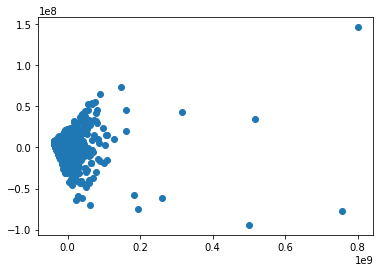

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.cluster import Birch
from sklearn.decomposition import PCA

feature_cols = [
    '0H-1H', '1H-2H', '2H-3H', '3H-4H', '4H-5H', '5H-6H',
    '6H-7H', '7H-8H', '8H-9H', '9H-10H', '10H-11H', '11H-12H',
    '12H-13H', '13H-14H', '14H-15H', '15H-16H', '16H-17H', '17H-18H',
    '18H-19H', '19H-20H', '20H-21H', '21H-22H', '22H-23H', '23H-0H',
]

for col in feature_cols:
    Data[col] = Data[col].astype(float)

X = Data.loc[:, feature_cols]

pca = PCA(n_components=2)
pca.fit(X)
X1 = pca.transform(X)

plt.plot(X1[:,0], X1[:,1], 'o')
plt.show()

In [74]:
Data['cluster'] = kmeans.labels_

In [78]:
Data[Data['cluster'] == 2]

,0H-1H,10H-11H,11H-12H,12H-13H,13H-14H,14H-15H,15H-16H,16H-17H,17H-18H,18H-19H,...,5H-6H,6H-7H,7H-8H,8H-9H,9H-10H,CAT_JOUR,ID_REFA_LDA,LIBELLE_ARRET,ND,cluster
0,1781993.0,11401738.0,11175213.0,15192249.0,16128551.0,14452269.0,15448977.0,21716158.0,29750230.0,26065430.0,...,1842400.0,4666406.0,17699122.0,40698919.0,25385856.0,JOHV,71654,REUILLY-DIDEROT,0,2
2,2679655.0,5724719.0,8106635.0,16700480.0,12802799.0,11232900.0,12220854.0,17877905.0,37136239.0,54323930.0,...,338340.0,757882.0,2923260.0,9067522.0,8702114.0,JOHV,71330,RICHELIEU-DROUOT,0,2
43,1060525.0,9073384.0,14906274.0,34555453.0,19354589.0,14376011.0,22595083.0,49550105.0,105316068.0,125318756.0,...,1031066.0,3004822.0,13315486.0,33111960.0,20857000.0,JOHV,71485,ESPLANADE DE LA DEFENSE,0,2
46,7066477.0,6838000.0,8274143.0,16580926.0,14394072.0,13300645.0,14067676.0,21819585.0,43067978.0,55976948.0,...,554873.0,1191346.0,4846983.0,12908969.0,10771074.0,JOHV,71326,GRANDS BOULEVARDS (RUE MONTMARTRE),0,2
52,4360041.0,30985926.0,27641816.0,32298171.0,33525756.0,36023255.0,38605416.0,53590413.0,79581340.0,80258628.0,...,7069193.0,28827070.0,66543545.0,152262808.0,80089306.0,JOHV,71410,GARE DU NORD,0,2
54,358225.0,8167536.0,8991455.0,12896110.0,12000547.0,11660233.0,19272521.0,39261492.0,57871297.0,40963063.0,...,1486634.0,8740697.0,33529888.0,48127569.0,17320193.0,JOHV,63880,VERSAILLES-CHANTIERS,0.0,2
73,130023.0,8377228.0,9491715.0,12835176.0,10401879.0,10531903.0,16865904.0,33898982.0,60200878.0,51545028.0,...,3157713.0,14265434.0,47978669.0,44226563.0,11980736.0,JOHV,63812,SAINT-QUENTIN-EN-YVELINES,0,2
94,5688570.0,9760831.0,11545069.0,20466259.0,20067429.0,20760133.0,23782842.0,30395018.0,53023354.0,70592850.0,...,734686.0,1259462.0,3568475.0,9257046.0,10264616.0,JOHV,71318,FRANKLIN-D.ROOSEVELT,0,2
102,970519.0,11258029.0,9952239.0,12934382.0,10816884.0,9634614.0,11610946.0,17804627.0,36368024.0,46479076.0,...,2188081.0,5928993.0,29733198.0,64230766.0,30474322.0,JOHV,70586,M. MONTROUGE,0,2
155,3082476.0,15233168.0,15537832.0,18100588.0,20125704.0,17670475.0,21111379.0,30143752.0,37168931.0,32186789.0,...,3530510.0,7186471.0,19014578.0,34606175.0,24122170.0,JOHV,71961,STALINGRAD,0,2


In [97]:
pca.explained_variance_ratio_.sum()

0.947493442939184